数据集:https://archive.ics.uci.edu/ml/datasets/Car+Evaluation  
Attribute Information:  
Class Values:   
unacc, acc, good, vgood   

Attributes:   
buying: vhigh, high, med, low.   
maint: vhigh, high, med, low.   
doors: 2, 3, 4, 5more.   
persons: 2, 4, more.   
lug_boot: small, med, big.   
safety: low, med, high.   

分类问题，四个类别unacc, acc, good, vgood   
六个属性  
前五行数据内容：
vhigh,vhigh,2,2,small,low,unacc  
vhigh,vhigh,2,2,small,med,unacc  
vhigh,vhigh,2,2,small,high,unacc  
vhigh,vhigh,2,2,med,low,unacc  
vhigh,vhigh,2,2,med,med,unacc  

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
input_file = "car.data.txt"
X = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)
        
X = np.array(X)

In [3]:
X[0]

array(['vhigh', 'vhigh', '2', '2', 'small', 'low', 'unacc'], dtype='<U5')

In [4]:
# 将字符串转化为数值
label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    label_encoder.append(LabelEncoder())
    X_encoded[:,i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [5]:
# 建立随机森林分类器
params = {'n_estimators':1000, 'max_depth':10, 'random_state':7}
classifier = RandomForestClassifier(**params)
classifier.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [6]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(classifier, X, y, scoring="accuracy", cv=5)
print("准确率: ", round(100.0*accuracy.mean(), 2))

准确率:  79.53


# 验证测试未知的数据

In [7]:
input_data = ["vhigh","vhigh","2","2","small","low"]
input_data_encoded = [-1]*len(input_data)
for i,item in enumerate(input_data):
    input_data_encoded[i] = label_encoder[i].transform(list([input_data[i]]))[0]
    
input_data_encoded = np.array(input_data_encoded)

In [8]:
input_data_encoded = np.array(input_data_encoded).reshape(1,-1)
output_pred = classifier.predict(input_data_encoded)
print("预测的结果是: ",label_encoder[-1].inverse_transform(output_pred)[0])

预测的结果是:  unacc


In [10]:
from sklearn.model_selection import validation_curve

In [11]:
classifier = RandomForestClassifier(max_depth=5, random_state=7)
parameter_grid = np.linspace(25,200,8).astype(int)
train_score, validation_score = validation_curve(classifier, X, y, "n_estimators", parameter_grid, cv=5)
print("validation curve: ")
print("nParam: n_estimators\nTraining scores: ",train_score)
print("nParam: n_estimators\nValidation scores: ",validation_score)

validation curve: 
nParam: n_estimators
Training scores:  [[0.89218524 0.85094067 0.89580318 0.84442836 0.85260116]
 [0.8813314  0.87554269 0.86975398 0.86034732 0.85260116]
 [0.86975398 0.88205499 0.88422576 0.86324168 0.85476879]
 [0.86903039 0.86758321 0.86758321 0.85962373 0.84537572]
 [0.87409551 0.86468886 0.86975398 0.85962373 0.84176301]
 [0.85890014 0.86613603 0.85962373 0.85890014 0.84176301]
 [0.86685962 0.85672938 0.85745297 0.85962373 0.84393064]
 [0.86541245 0.85745297 0.85383502 0.85745297 0.84320809]]
nParam: n_estimators
Validation scores:  [[0.69653179 0.76878613 0.69075145 0.82080925 0.78488372]
 [0.71098266 0.76011561 0.71387283 0.82369942 0.79069767]
 [0.70231214 0.76589595 0.72254335 0.82080925 0.79069767]
 [0.70231214 0.75722543 0.71676301 0.82080925 0.78197674]
 [0.70520231 0.76878613 0.71676301 0.82369942 0.77906977]
 [0.71098266 0.76878613 0.71676301 0.82080925 0.78197674]
 [0.71098266 0.7716763  0.71387283 0.83236994 0.78488372]
 [0.71098266 0.76589595 0.7138

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

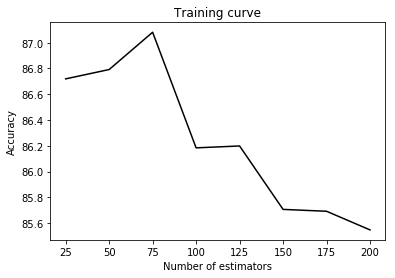

In [16]:
plt.figure()
plt.plot(parameter_grid, 100.0*np.average(train_score, axis=1),color="black")
plt.title("Training curve")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

In [17]:
classifier = RandomForestClassifier(n_estimators=75, random_state=7)
parameter_grid = np.linspace(2,10,5).astype(int)
train_score, validation_score = validation_curve(classifier, X, y, "max_depth", parameter_grid, cv=5)
print("validation curve: ")
print("nParam: n_estimators\nTraining scores: ",train_score)
print("nParam: n_estimators\nValidation scores: ",validation_score)

validation curve: 
nParam: n_estimators
Training scores:  [[0.7105644  0.70043415 0.70911722 0.70043415 0.69942197]
 [0.80101302 0.80680174 0.81114327 0.81476122 0.8150289 ]
 [0.91751085 0.92691751 0.9276411  0.91678726 0.91473988]
 [0.97684515 0.97467438 0.97322721 0.98263386 0.97687861]
 [0.99855282 0.99855282 0.99855282 1.         0.99638728]]
nParam: n_estimators
Validation scores:  [[0.69942197 0.69942197 0.7283237  0.69942197 0.70348837]
 [0.71098266 0.72254335 0.71965318 0.75722543 0.74418605]
 [0.72543353 0.76300578 0.72543353 0.84682081 0.84883721]
 [0.65317919 0.79190751 0.78612717 0.78901734 0.90697674]
 [0.62138728 0.79479769 0.82080925 0.84393064 0.88662791]]


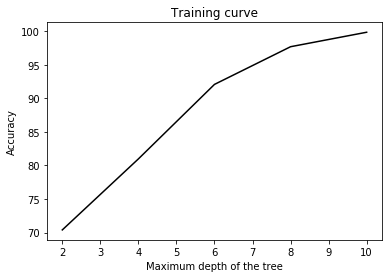

In [18]:
plt.figure()
plt.plot(parameter_grid, 100.0*np.average(train_score, axis=1),color="black")
plt.title("Training curve")
plt.xlabel("Maximum depth of the tree")
plt.ylabel("Accuracy")
plt.show()